In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

diabetes_data =pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
diabetes_data.shape

(768, 9)

In [84]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [85]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 함수 만들기

- get_clf_eval

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion= confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # roc_auc score 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    
    print('오차행렬')
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도" {1:.4f}, 재현율: {2:.4f}\n F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1,roc_auc))

In [88]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict =binarizer.transform(pred_proba_c1)
        pred = lr_clf.predict(X_test)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, pred, custom_predict)
        


In [89]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle = '--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    
    plt.xlabel('Threshold value');
    plt.ylabel('Precision and Revall value')
    plt.legend();plt.grid()
    plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = diabetes_data.iloc[:,:-1]
y= diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size =0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
pred_proba

array([0.04172771, 0.20917115, 0.16486482, 0.51654256, 0.08163583,
       0.69377172, 0.7129812 , 0.18560667, 0.18713205, 0.20069864,
       0.62782738, 0.4837253 , 0.07645341, 0.34847975, 0.26343401,
       0.14255367, 0.71538135, 0.3413491 , 0.03127397, 0.71612055,
       0.35068866, 0.30482244, 0.07257644, 0.33017263, 0.30047598,
       0.14754275, 0.84916789, 0.65839518, 0.25151528, 0.79313494,
       0.20206418, 0.22290252, 0.17976056, 0.24998243, 0.17613351,
       0.57897541, 0.28693103, 0.54660466, 0.74859006, 0.6322441 ,
       0.4847364 , 0.29948649, 0.59450706, 0.21644279, 0.35043399,
       0.05718108, 0.71566663, 0.13285685, 0.50011656, 0.31776535,
       0.32251204, 0.81024109, 0.8321909 , 0.11313508, 0.18902302,
       0.37461001, 0.10654131, 0.3893184 , 0.34618754, 0.4423722 ,
       0.22798846, 0.72697345, 0.31266642, 0.60788442, 0.2754459 ,
       0.15396772, 0.22646377, 0.71075908, 0.19032604, 0.72376509,
       0.1231148 , 0.33718518, 0.14896053, 0.45161585, 0.64883

In [91]:
get_clf_eval(y_test,pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]

정확도: 0.7727, 정밀도" 0.7111, 재현율: 0.5926
 F1: 0.6465, AUC: 0.8083


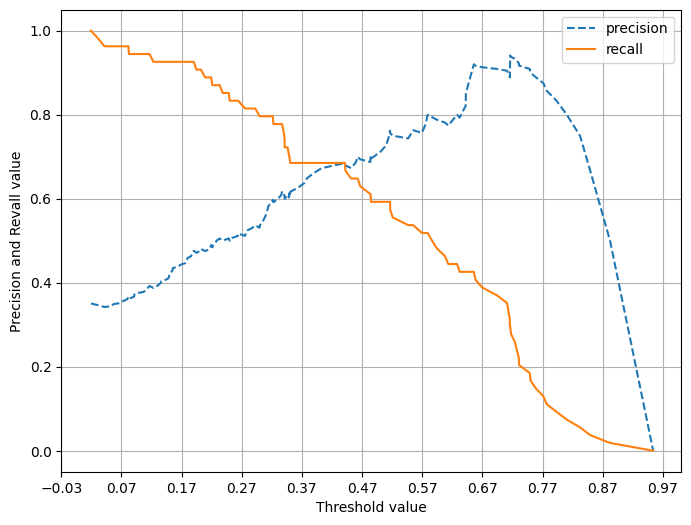

In [92]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [98]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


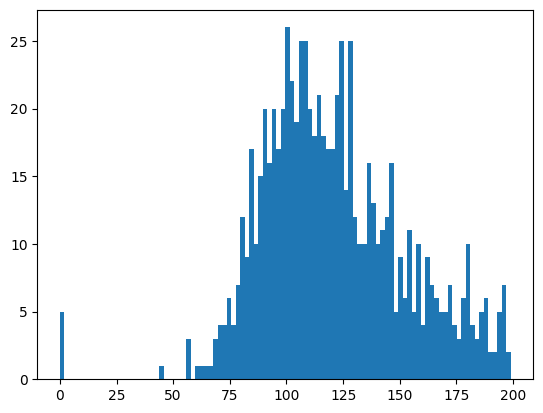

In [99]:
plt.hist(diabetes_data['Glucose'],bins=100);

In [100]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [101]:
zero_count = diabetes_data[diabetes_data['Glucose']==0]['Glucose'].count()
zero_count

5

In [102]:
zero_features =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

total_count = diabetes_data['Glucose'].count()

In [103]:
for f in zero_features:
    zero_count = diabetes_data[diabetes_data[f]==0][f].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(f,zero_count, zero_count/total_count*100))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [72]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [104]:
diabetes_data['SkinThickness'].mean()

20.536458333333332

In [105]:
diabetes_data['Insulin'].mean()


79.79947916666667

In [106]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [107]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [108]:
from sklearn.preprocessing import StandardScaler
X= diabetes_data.iloc[:,:-1]
y= diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test  = train_test_split(X_scaled, y, test_size =0.2, random_state=156, stratify=y)

In [109]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]



In [110]:
get_clf_eval(y_test,pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.8433


In [111]:
thresholds =[0.3,0.33,0.35,0.39,0.42,0.45,0.48,0.50]

In [112]:
pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)
get_eval_by_threshold(y_test, pred_proba, thresholds)

임계값: 0.3
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7331
임계값: 0.33
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7489
임계값: 0.35
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7361
임계값: 0.39
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7419
임계값: 0.42
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7533
임계값: 0.45
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7583
임계값: 0.48
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7641
임계값: 0.5
오차행렬
[[90 10]
 [21 33]]

정확도: 0.7987, 정밀도" 0.7674, 재현율: 0.6111
 F1: 0.6804, AUC: 0.7556
